In [ ]:
from pathlib import Path
from zipfile import ZipFile
import requests

URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()
    print('Bestand is gedownload en uitgepakt')
else:
    print('Bestand bestaat al')




## Lees de data

In [ ]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df.info()

## Filter de kolommen
We zijn alleen geïnteresseerd in Survived, Sex, Pclass en Age

In [ ]:
df = df[['Survived', 'Sex', 'Pclass', 'Age']]
df.info()

## Sex is een category

In [ ]:
df['Sex'] = df.Sex.astype('category')
df.info()

## Survived is een boolean

In [ ]:
df['Survived'] = df.Survived.astype(pd.BooleanDtype())
df.info()

## Alleen bekende leeftijden overhouden


In [ ]:
df = df.dropna()
df.info()

## Bereken de aantallen overlevenden/niet-overlevenden per klasse

In [ ]:
per_Pclass = df.groupby(['Pclass', 'Survived']).size().unstack() #zet Pclass als index
per_Pclass

## Bereken de percentages

In [ ]:
percentages = per_Pclass.div(per_Pclass.sum(axis=1), axis=0) * 100
percentages

## Plot de overlevingskans per klasse

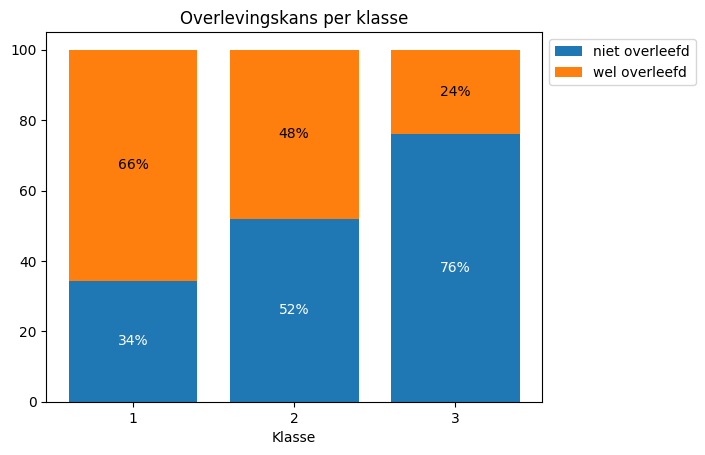

In [29]:
import matplotlib.pyplot as plt

bar = plt.bar(percentages.index, percentages.iloc[:, 0], label='niet overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center', color='white')
bar = plt.bar(percentages.index, percentages.iloc[:, 1], bottom=percentages.iloc[:, 0], label='wel overleefd')
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.xticks(per_Pclass.index)
plt.show()

# Verdeling leeftijd-overleefd per klasse en per geslacht
Maak de onderstaande grafiek. Je mag de hulp inroepen van ChatGPT. Maar beschrijf zelf in markdown cellen wat elke stap doet (vraag geen bijkomende uitleg aan ChatGPT). Dat wil zeggen dat je de documentatie zult moeten opzoeken voor elke functie die ChatGPT gebruikt en die je niet kent. 

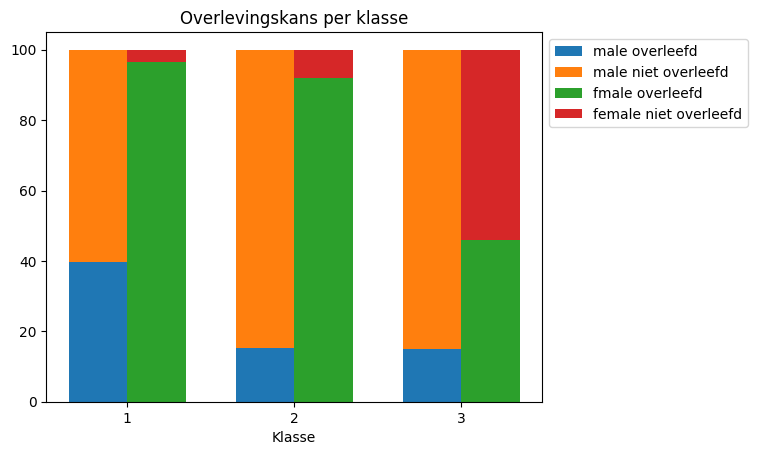